In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/spam.csv", encoding = 'latin-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# check for missing values
df.isnull().sum()

,0
Category,0
Message,0


In [6]:
# duplicate values
df.duplicated().sum()

np.int64(415)

In [7]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [8]:
# apply label encoder to label column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

/tmp/ipython-input-11112753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le.fit_transform(df['Category'])


# Exploratory Data Analysis(EDA)


In [9]:
# check value count
df['Category'].value_counts()

,count
Category,
0,4516
1,641


<BarContainer object of 2 artists>

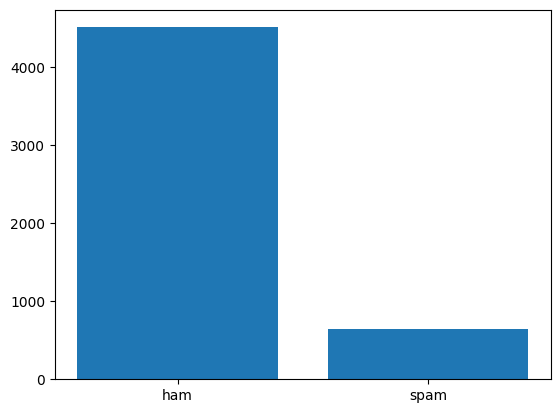

In [10]:
# visualization
plt.bar(['ham', 'spam'], df['Category'].value_counts())

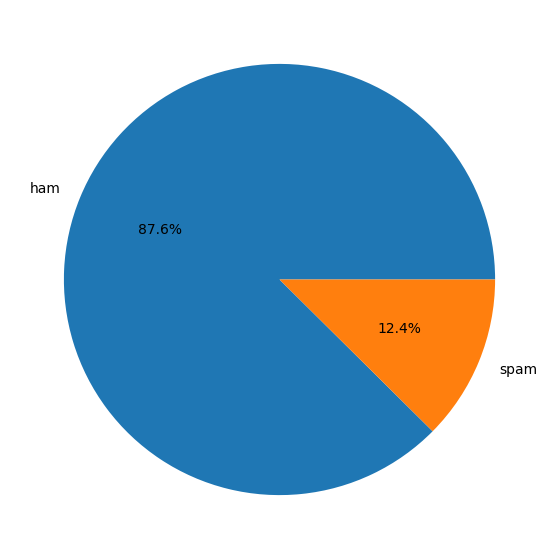

In [11]:
plt.figure(figsize = (7,7))
plt.pie(df['Category'].value_counts(), labels = ['ham', 'spam'], autopct = '%1.1f%%')
plt.show()

In [12]:
# check message column
print(df['Message'][0])
print(df['Message'][1])
print(df['Message'][2])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [13]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Email length analysis
df['email_length'] = df['Message'].apply(len)

/tmp/ipython-input-3851345493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['email_length'] = df['Message'].apply(len)


In [15]:
# number of words
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

/tmp/ipython-input-1934006465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [16]:
# number of sentence
df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

/tmp/ipython-input-582614460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [17]:
df.head()

,Category,Message,email_length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#Text Preprocessing

In [18]:
# text preprocessing
import nltk
from nltk.corpus import stopwords
import string

def transform_text(text):
  text = text.lower()                                 # convert all the text to lowercase
  text = nltk.word_tokenize(text)                     # split the sentence into words or tokens
  y = []
  for i in text:
    if i.isalnum():                                   # keep only alphanumeric tokens
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:    # Remove punctuation and special charactersdf
      y.append(i)
  return " ".join(y)


In [19]:
transform_text('Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005')

'free entry 2 wkly comp win fa cup final tkts 21st may 2005'

In [20]:
# apply stemming (reduce words to their root form)
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
  text = text.lower()
  tokens = nltk.word_tokenize(text)
  tokens = [ps.stem(word) for word in tokens if word.isalpha()]
  return " ".join(tokens)


In [21]:
# Apply the transform_text function to the 'Message' column
df['cleaned_text'] = df['Message'].apply(transform_text)

df.head()

/tmp/ipython-input-4175504630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['Message'].apply(transform_text)


,Category,Message,email_length,num_words,num_sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [22]:
# check wordcloud
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

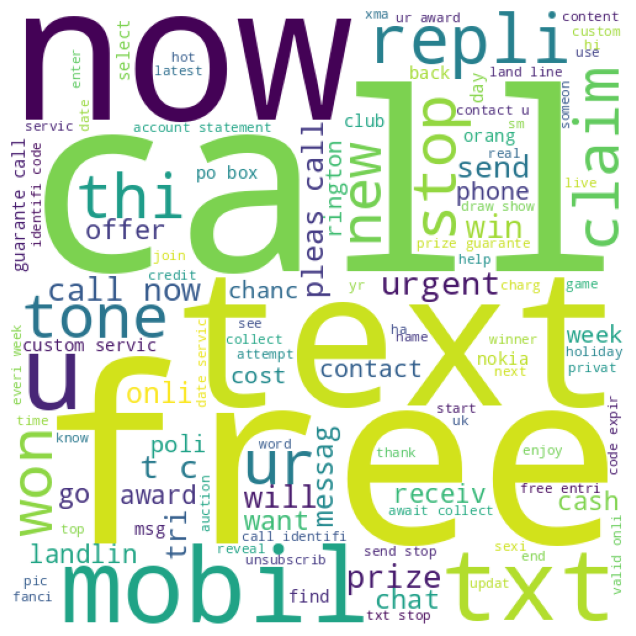

In [23]:
# Create a corpus of spam messages
spam_corpus = " ".join(df[df['Category'] == 1]['cleaned_text'])

# Generate wordcloud for spam messages
wc.generate(spam_corpus)

# Display the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

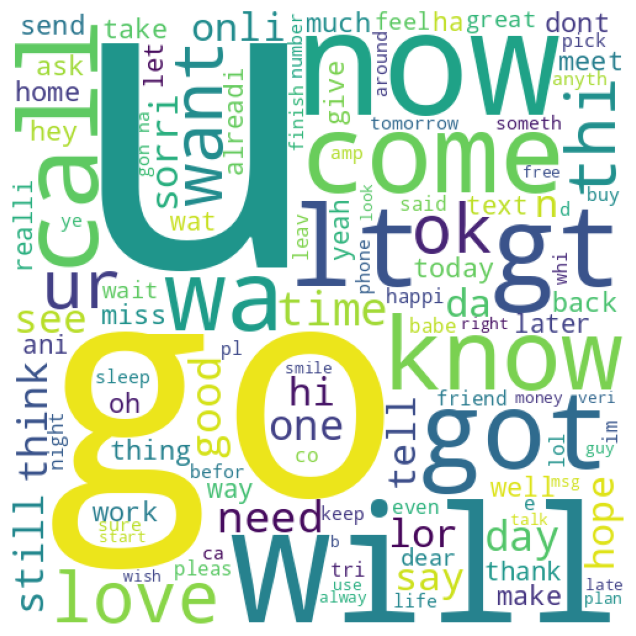

In [24]:
# Create a corpus of ham messages
ham_corpus = " ".join(df[df['Category'] == 0]['cleaned_text'])

# Generate wordcloud for spam messages
wc.generate(ham_corpus)

# Display the wordcloud
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Model Building

In [25]:
# text representation / converting text into numbers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [26]:
X = tfidf.fit_transform(df['cleaned_text']).toarray()

In [27]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [28]:
X.shape

(5157, 3000)

In [29]:
y = df['Category']

In [30]:
y.shape

(5157,)

In [31]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [32]:
# import models library
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

# Define models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(solver = 'liblinear', penalty = 'l1'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=50),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='sigmoid', gamma = 1.0),
    'XGBoost': XGBClassifier(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Initialize evaluation dictionary
evaluation_result = {
    'Model': [],
    'Accuracy': [],
    'Precision': []
}

# Fit and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    evaluation_result['Model'].append(name)
    evaluation_result['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    evaluation_result['Precision'].append(round(precision_score(y_test, y_pred), 4))

# Display sorted DataFrame
evaluation_df = pd.DataFrame(evaluation_result)
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)
display(evaluation_df)

,Model,Accuracy,Precision
0,Naive Bayes,0.9797,0.9323
3,Random Forest,0.9758,0.9826
6,XGBoost,0.9748,0.9583
1,Logistic Regression,0.9729,0.9500
8,Gradient Boosting,0.9632,0.9455
5,SVM,0.9603,0.8992
7,AdaBoost,0.9457,0.9082
2,Decision Tree,0.9331,0.8454
4,KNN,0.9254,1.0000


In [34]:
import plotly.graph_objects as go

# Create the bar chart
fig = go.Figure()

# Add Accuracy bars
fig.add_trace(go.Bar( x=evaluation_df['Model'],y=evaluation_df['Accuracy'],name='Accuracy',marker_color='lightskyblue'))

# Add Precision bars
fig.add_trace(go.Bar(x=evaluation_df['Model'], y=evaluation_df['Precision'],name='Precision',marker_color='lightcoral'))

# Customize layout
fig.update_layout(
    title='Model Comparison: Accuracy vs Precision',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',
    xaxis_tickangle=-45,
    yaxis=dict(range=[0.8, 1.05]),
    template='plotly_white',
    legend=dict(x=0.85, y=1.15)
)

fig.show()

In [35]:
# save the model and vectorizer
import pickle

# Access the trained MultinomialNB model from the models dictionary
try:
    mnb_model = models['Naive Bayes']
    pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
    pickle.dump(mnb_model, open('model.pkl', 'wb'))
    print("Vectorizer and model saved successfully.")
except NameError:
    print("Error: The 'models' dictionary is not defined. Please run the model training cell (UrpLLiuH3sqd) first.")
except KeyError:
    print("Error: 'Naive Bayes' not found in the 'models' dictionary. Please check the model names in the training cell.")

Vectorizer and model saved successfully.
